In [2]:
import pandas as pd

perfo = pd.read_excel(r"D:\GG\LQR MINAS\Marker Analysis.xlsx", sheet_name = "Final Completion")
perfo.drop(["NO", "MARKER"], axis=1, inplace=True)

In [3]:
perfo

,DATE,STATUS,WELL,TOP,BOTTOM
0,2013-02-28,perforation,0D96,2314.0,2321.0
1,2015-06-30,perforation,0D96,2383.0,2388.0
2,2013-04-15,perforation,0D97,2402.0,2407.0
3,2013-04-15,perforation,0D97,2428.0,2430.0
4,2001-05-26,perforation,0D97N,2684.0,2696.0
...,...,...,...,...,...
200330,2020-08-03,perforation,9E94,2524.0,2528.0
200331,2020-08-03,perforation,9E94,2528.0,2534.0
200332,2020-08-03,perforation,9E94,2546.0,2576.0
200333,2020-08-03,perforation,9E94,2576.0,2586.0


In [4]:
# pivoting all table in Thin Sihapas Group

import pandas as pd

## initializing list of sand and empty dataframe
sands = ["A1", "A2", "B1", "B2", "D"]
result = {}

for sand in sands:
    result[sand] = pd.read_excel(r"D:\GG\LQR MINAS\Marker Analysis.xlsx", sheet_name = sand)
    result[sand]= pd.pivot_table(result[sand], index=["Well identifier","UWI"], columns = "Surface", values = "MD")
    result[sand] = result[sand].reset_index().rename_axis(None, axis=1)

# rearranging columns for each sands in Thin Sihapas Group

result["A1"] = result["A1"][["Well identifier", "UWI", "T_A1_U1", "B_A1_U1", "T_A1_L1", "B_A1_L1"]]
result["A2"] = result["A2"][["Well identifier", "UWI", "T_A2_U1", "B_A2_U1"]]
result["B1"] = result["B1"][["Well identifier", "UWI", "T_B1_U2", "B_B1_U2", "T_B1_U1", "B_B1_U1"]]
result["B2"] = result["B2"][["Well identifier", "UWI", "T_B2_U3", "B_B2_U3", "T_B2_U2", "B_B2_U2", "T_B2_U1", "B_B2_U1"]]
result["D"] = result["D"][["Well identifier", "UWI", "T_D_U4", "B_D_U4", "T_D_U3", "B_D_U3", "T_D_U2", "B_D_U2", "T_D_U1", "B_D_U1"]]

In [190]:
result

{'A1':     Well identifier    UWI  T_A1_U1  B_A1_U1  T_A1_L1  B_A1_L1
 0         MINA00002   7D58  2349.24  2365.64      NaN      NaN
 1         MINA00005   7D86  2305.13  2315.66      NaN      NaN
 2         MINA00008   6E58  2431.74  2440.52      NaN      NaN
 3         MINA00010   7E55  2317.56  2332.18      NaN      NaN
 4         MINA00012   6D89  2325.77  2330.07      NaN      NaN
 ..              ...    ...      ...      ...      ...      ...
 793     MINA01971D1   6F81  2581.29      NaN      NaN      NaN
 794     MINA01977D1  7E75E  2384.12      NaN      NaN      NaN
 795     MINA01979D1   9D73  2389.19      NaN      NaN      NaN
 796     MINA01981D1  6D23E  2456.22      NaN      NaN      NaN
 797     MINA01982D1  6D11E  2328.21      NaN      NaN      NaN
 
 [798 rows x 6 columns],
 'A2':     Well identifier    UWI  T_A2_U1  B_A2_U1
 0         MINA00002   7D58  2417.67  2420.24
 1         MINA00010   7E55  2386.79  2393.91
 2         MINA00012   6D89  2381.60  2385.02
 3       

In [5]:
# joining all table in Thin Sihapas Group into Perforation Table

for sand in sands:
    perfo = perfo.merge(result[sand], how = 'left', left_on = 'WELL', right_on = 'UWI')

perfo

C:\Users\Lapi-ITB\AppData\Local\Temp\ipykernel_23376\3109999298.py:4: FutureWarning: Passing 'suffixes' which cause duplicate columns {'UWI_x', 'Well identifier_x'} in the result is deprecated and will raise a MergeError in a future version.
  perfo = perfo.merge(result[sand], how = 'left', left_on = 'WELL', right_on = 'UWI')


,DATE,STATUS,WELL,TOP,BOTTOM,Well identifier_x,UWI_x,T_A1_U1,B_A1_U1,T_A1_L1,...,Well identifier,UWI,T_D_U4,B_D_U4,T_D_U3,B_D_U3,T_D_U2,B_D_U2,T_D_U1,B_D_U1
0,2013-02-28,perforation,0D96,2314.0,2321.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-06-30,perforation,0D96,2383.0,2388.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013-04-15,perforation,0D97,2402.0,2407.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2013-04-15,perforation,0D97,2428.0,2430.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2001-05-26,perforation,0D97N,2684.0,2696.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200330,2020-08-03,perforation,9E94,2524.0,2528.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
200331,2020-08-03,perforation,9E94,2528.0,2534.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
200332,2020-08-03,perforation,9E94,2546.0,2576.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
200333,2020-08-03,perforation,9E94,2576.0,2586.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
perfo.to_excel(r"D:\GG\LQR MINAS\perfo trial.xlsx")

In [6]:
# joining Telisa and Thin Sihapas Group with Perforation Table

telisa = pd.read_excel(r"D:\GG\LQR MINAS\Marker Analysis 2.xlsx", sheet_name = "Telisa Formation")
telisa = pd.pivot_table(telisa, index = ["Well identifier", "UWI"], columns = "Surface", values = "MD")
telisa = telisa.reset_index().rename_axis(None, axis = 1)

LQR = perfo.merge(telisa, how = 'left', left_on = 'WELL', right_on = 'UWI')

C:\Users\Lapi-ITB\AppData\Local\Temp\ipykernel_23376\3501016006.py:7: FutureWarning: Passing 'suffixes' which cause duplicate columns {'UWI_x', 'Well identifier_x'} in the result is deprecated and will raise a MergeError in a future version.
  LQR = perfo.merge(telisa, how = 'left', left_on = 'WELL', right_on = 'UWI')


In [7]:
LQR.columns

Index(['DATE', 'STATUS', 'WELL', 'TOP', 'BOTTOM', 'Well identifier_x', 'UWI_x',
       'T_A1_U1', 'B_A1_U1', 'T_A1_L1', 'B_A1_L1', 'Well identifier_y',
       'UWI_y', 'T_A2_U1', 'B_A2_U1', 'Well identifier_x', 'UWI_x', 'T_B1_U2',
       'B_B1_U2', 'T_B1_U1', 'B_B1_U1', 'Well identifier_y', 'UWI_y',
       'T_B2_U3', 'B_B2_U3', 'T_B2_U2', 'B_B2_U2', 'T_B2_U1', 'B_B2_U1',
       'Well identifier_x', 'UWI_x', 'T_D_U4', 'B_D_U4', 'T_D_U3', 'B_D_U3',
       'T_D_U2', 'B_D_U2', 'T_D_U1', 'B_D_U1', 'Well identifier_y', 'UWI_y',
       'B_TET2', 'B_TET4', 'T_TET1', 'T_TET2', 'T_TET2C', 'T_TET3', 'T_TET4',
       'T_TETX'],
      dtype='object')

In [8]:
LQR.drop(["Well identifier_x","UWI_x", "Well identifier_y", "UWI_y", 
          "Well identifier_x", "UWI_x", "Well identifier_y", "UWI_y", 
          "Well identifier_x", "UWI_x", "Well identifier_y", "UWI_y"], 
          axis = 1, inplace = True)

In [9]:
LQR = LQR[['DATE', 'STATUS', 'WELL', 'TOP', 'BOTTOM', #Base
     'T_TETX', 'T_TET1', 'T_TET2', 'T_TET2C', 'B_TET2', 'T_TET3', 'T_TET4', 'B_TET4', #Telisa
     'T_A1_U1', 'B_A1_U1', 'T_A1_L1', 'B_A1_L1', #A1
     'T_A2_U1', 'B_A2_U1', #A2
     'T_B1_U2', 'B_B1_U2', 'T_B1_U1', 'B_B1_U1', #B1
     'T_B2_U3', 'B_B2_U3', 'T_B2_U2', 'B_B2_U2', 'T_B2_U1', 'B_B2_U1', #B2
     'T_D_U4', 'B_D_U4', 'T_D_U3', 'B_D_U3', 'T_D_U2', 'B_D_U2', 'T_D_U1', 'B_D_U1']] #D

In [10]:
LQR

,DATE,STATUS,WELL,TOP,BOTTOM,T_TETX,T_TET1,T_TET2,T_TET2C,B_TET2,...,T_B2_U1,B_B2_U1,T_D_U4,B_D_U4,T_D_U3,B_D_U3,T_D_U2,B_D_U2,T_D_U1,B_D_U1
0,2013-02-28,perforation,0D96,2314.0,2321.0,2036.16,2056.48,2096.20,2139.84,2181.61,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-06-30,perforation,0D96,2383.0,2388.0,2036.16,2056.48,2096.20,2139.84,2181.61,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013-04-15,perforation,0D97,2402.0,2407.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2013-04-15,perforation,0D97,2428.0,2430.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2001-05-26,perforation,0D97N,2684.0,2696.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200330,2020-08-03,perforation,9E94,2524.0,2528.0,1897.69,1964.29,2044.39,2119.41,2149.78,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
200331,2020-08-03,perforation,9E94,2528.0,2534.0,1897.69,1964.29,2044.39,2119.41,2149.78,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
200332,2020-08-03,perforation,9E94,2546.0,2576.0,1897.69,1964.29,2044.39,2119.41,2149.78,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
200333,2020-08-03,perforation,9E94,2576.0,2586.0,1897.69,1964.29,2044.39,2119.41,2149.78,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# joining LQR with Top Main Reservoir MFFM 2022

top =  pd.read_excel(r"D:\GG\LQR MINAS\Marker Analysis 2.xlsx", sheet_name = "Top Marker Sihapas 2022")
top = pd.pivot_table(top, index = ["Well identifier", "UWI"], columns = "Surface", values = "MD")
top = top.reset_index().rename_axis(None, axis = 1)

LQR_MFFM = LQR.merge(top, how = 'left', left_on = 'WELL', right_on = 'UWI')

In [12]:
LQR_MFFM.drop(["Well identifier", "UWI"], axis = 1, inplace = True)

In [13]:
LQR_MFFM = LQR_MFFM[['DATE', 'STATUS', 'WELL', 'TOP', 'BOTTOM', #Base
     'T_TETX', 'T_TET1', 'T_TET2', 'T_TET2C', 'B_TET2', 'T_TET3', 'T_TET4', 'B_TET4', #Telisa
     'BKX', 'BKA1', 'B_BKA1', 'T_A1_U1', 'B_A1_U1', 'T_A1_L1', 'B_A1_L1', #A1
     'BKA2','T_A2_U1', 'B_A2_U1', #A2
     'BNB1','T_B1_U2', 'B_B1_U2', 'T_B1_U1', 'B_B1_U1', #B1
     'BNB2','T_B2_U3', 'B_B2_U3', 'T_B2_U2', 'B_B2_U2', 'T_B2_U1', 'B_B2_U1', #B2
     'BND','T_D_U4', 'B_D_U4', 'T_D_U3', 'B_D_U3', 'T_D_U2', 'B_D_U2', 'T_D_U1', 'B_D_U1', 'MNS']] #D

In [14]:
LQR_MFFM

,DATE,STATUS,WELL,TOP,BOTTOM,T_TETX,T_TET1,T_TET2,T_TET2C,B_TET2,...,BND,T_D_U4,B_D_U4,T_D_U3,B_D_U3,T_D_U2,B_D_U2,T_D_U1,B_D_U1,MNS
0,2013-02-28,perforation,0D96,2314.0,2321.0,2036.16,2056.48,2096.20,2139.84,2181.61,...,2457.73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-06-30,perforation,0D96,2383.0,2388.0,2036.16,2056.48,2096.20,2139.84,2181.61,...,2457.73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013-04-15,perforation,0D97,2402.0,2407.0,NaN,NaN,NaN,NaN,NaN,...,2511.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2013-04-15,perforation,0D97,2428.0,2430.0,NaN,NaN,NaN,NaN,NaN,...,2511.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2001-05-26,perforation,0D97N,2684.0,2696.0,NaN,NaN,NaN,NaN,NaN,...,2762.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200330,2020-08-03,perforation,9E94,2524.0,2528.0,1897.69,1964.29,2044.39,2119.41,2149.78,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
200331,2020-08-03,perforation,9E94,2528.0,2534.0,1897.69,1964.29,2044.39,2119.41,2149.78,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
200332,2020-08-03,perforation,9E94,2546.0,2576.0,1897.69,1964.29,2044.39,2119.41,2149.78,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
200333,2020-08-03,perforation,9E94,2576.0,2586.0,1897.69,1964.29,2044.39,2119.41,2149.78,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Intiating Default Values

In [15]:
LQR_MFFM.fillna(9999, inplace = True)
LQR_MFFM['Sand_TETX'] = 9999
LQR_MFFM['Sand_TET1'] = 9999
LQR_MFFM['Sand_TET2'] = 9999
LQR_MFFM['Sand_TET2C'] = 9999
LQR_MFFM['Sand_B_TET2'] = 9999
LQR_MFFM['Sand_BKX'] = 9999
LQR_MFFM['Sand_BKA1'] = 9999
LQR_MFFM['Sand_B_BKA1'] = 9999
LQR_MFFM['Sand_A1_U1'] = 9999
LQR_MFFM['Sand_A1_L1'] = 9999
LQR_MFFM['Sand_BKA2'] = 9999
LQR_MFFM['Sand_A2_U1'] = 9999
LQR_MFFM['Sand_BNB1'] = 9999
LQR_MFFM['Sand_B1_U2'] = 9999
LQR_MFFM['Sand_B1_U1'] = 9999
LQR_MFFM['Sand_BNB2'] = 9999
LQR_MFFM['Sand_B2_U3'] = 9999
LQR_MFFM['Sand_B2_U2'] = 9999
LQR_MFFM['Sand_B2_U1'] = 9999
LQR_MFFM['Sand_BND'] = 9999
LQR_MFFM['Sand_D_U4'] = 9999
LQR_MFFM['Sand_D_U3'] = 9999
LQR_MFFM['Sand_D_U2'] = 9999
LQR_MFFM['Sand_D_U1'] = 9999
LQR_MFFM['Sand_MNS'] = 9999

# Marker Worflow (Telisa and Sihapas (HQ))

In [ ]:
for i in LQR_MFFM.index:

    ## TELISA FORMATION

    # TETX
    if LQR_MFFM['TOP'][i] > LQR_MFFM['T_TETX'][i] and LQR_MFFM['TOP'][i] < LQR_MFFM['T_TET1'][i]:
        if LQR_MFFM['BOTTOM'][i] > LQR_MFFM['T_TET1'][i]:
            LQR_MFFM['Sand_T_TETX'][i] = "T_TETX"
            LQR_MFFM['Sand_T_TET1'][i] = "T_TET1"
        else:
            LQR_MFFM['Sand_T_TEX'][i] = "T_TEX"
    # TET1
    if LQR_MFFM['TOP'][i] > LQR_MFFM['T_TET1'][i] and LQR_MFFM['TOP'][i] < LQR_MFFM['T_TET2'][i]:
        if LQR_MFFM['BOTTOM'][i] > LQR_MFFM['T_TET2'][i]:
            LQR_MFFM['Sand_T_TET1'][i] = "T_TET1"
            LQR_MFFM['Sand_T_TET2'][i] = "T_TET2"
        else:
            LQR_MFFM['Sand_T_TET1'][i] = "T_TET1"
    # TET2
    if LQR_MFFM['TOP'][i] > LQR_MFFM['T_TET2'][i] and LQR_MFFM['TOP'][i] < LQR_MFFM['T_TET2C'][i]:
        if LQR_MFFM['BOTTOM'][i] > LQR_MFFM['T_TET2C'][i]:
            LQR_MFFM['Sand_T_TET2'][i] = "T_TET2"
            LQR_MFFM['Sand_T_TET2C'][i] = "T_TET2C"
        else:
            LQR_MFFM['Sand_T_TET2'][i] = "T_TET2"
    # TET2C
    if LQR_MFFM['TOP'][i] > LQR_MFFM['T_TET2C'][i] and LQR_MFFM['TOP'][i] < LQR_MFFM['B_TET2'][i]:
        if LQR_MFFM['BOTTOM'][i] > LQR_MFFM['B_TET2'][i]:
            LQR_MFFM['Sand_T_TET2C'][i] = "T_TET2C"
            LQR_MFFM['Sand_B_TET2'][i] = "B_TET2"
        else:
            LQR_MFFM['Sand_T_TET2C'][i] = "T_TET2C"
    # B_TET2
    if LQR_MFFM['TOP'][i] > LQR_MFFM['B_TET2'][i] and LQR_MFFM['TOP'][i] < LQR_MFFM['T_TET3'][i]:
        if LQR_MFFM['BOTTOM'][i] > LQR_MFFM['T_TET3'][i]:
            LQR_MFFM['Sand_B_TET2'][i] = "B_TET2"
            LQR_MFFM['Sand_T_TET3'][i] = "T_TET3"
        else:
            LQR_MFFM['Sand_B_TET2'][i] = "B_TET2"
    # TET3
    if LQR_MFFM['TOP'][i] > LQR_MFFM['T_TET3'][i] and LQR_MFFM['TOP'][i] < LQR_MFFM['T_TET4'][i]:
        if LQR_MFFM['BOTTOM'][i] > LQR_MFFM['T_TET4'][i]:
            LQR_MFFM['Sand_T_TET3'][i] = "T_TET3"
            LQR_MFFM['Sand_T_TET4'][i] = "T_TET4"
        else:
            LQR_MFFM['Sand_T_TET3'][i] = "T_TET3"
    # TET4
    if LQR_MFFM['TOP'][i] > LQR_MFFM['T_TET4'][i] and LQR_MFFM['TOP'][i] < LQR_MFFM['B_TET4'][i]:
        if LQR_MFFM['BOTTOM'][i] > LQR_MFFM['B_TET2'][i]:
            LQR_MFFM['Sand_T_TET4'][i] = "T_TET4"
            LQR_MFFM['Sand_B_TET4'][i] = "B_TET4"
        else:
            LQR_MFFM['Sand_T_TET4'][i] = "T_TET4"
    
    ## SIHAPAS GROUP

    # BKX
    if LQR_MFFM['TOP'][i] > LQR_MFFM['BKX'][i] and LQR_MFFM['TOP'][i] < LQR_MFFM['BKA1'][i]:
        if LQR_MFFM['BOTTOM'][i] > LQR_MFFM['BKA1'][i]:
            LQR_MFFM['Sand_BKX'][i] = LQR_MFFM['BKA1'][i] - LQR_MFFM['TOP'][i]
            LQR_MFFM['Sand_BKA1'][i] = LQR_MFFM['BOTTOM'][i] - LQR_MFFM['BKA1'][i]
        else:
            LQR_MFFM['Sand_BKX'][i] = LQR_MFFM['BOTTOM'][i] - LQR_MFFM['TOP'][i]
    # BKA1
    if LQR_MFFM['TOP'][i] > LQR_MFFM['BKA1'][i] and LQR_MFFM['TOP'][i] < LQR_MFFM['B_BKA1'][i]:
        if LQR_MFFM['BOTTOM'][i] > LQR_MFFM['B_BKA1'][i]:
            LQR_MFFM['Sand_BKA1'][i] = LQR_MFFM['B_BKA1'][i] - LQR_MFFM['TOP'][i]
            LQR_MFFM['Sand_B_BKA1'][i] = LQR_MFFM['BOTTOM'][i] - LQR_MFFM['B_BKA1'][i]
        else:
            LQR_MFFM['Sand_BKA1'][i] = LQR_MFFM['BOTTOM'][i] - LQR_MFFM['TOP'][i]
    # B_BKA1
    if LQR_MFFM['TOP'][i] > LQR_MFFM['B_BKA1'][i] and LQR_MFFM['TOP'][i] < LQR_MFFM['BKA2'][i]:
        if LQR_MFFM['BOTTOM'][i] > LQR_MFFM['BKA2'][i]:
            LQR_MFFM['Sand_B_BKA1'][i] = LQR_MFFM['BKA2'][i] - LQR_MFFM['TOP'][i]
            LQR_MFFM['Sand_BKA2'][i] = LQR_MFFM['BOTTOM'][i] - LQR_MFFM['BKA2'][i]
        else:
            LQR_MFFM['Sand_B_BKA1'][i] = LQR_MFFM['BOTTOM'][i] - LQR_MFFM['TOP'][i]
    # BKA2
    if LQR_MFFM['TOP'][i] > LQR_MFFM['BKA2'][i] and LQR_MFFM['TOP'][i] < LQR_MFFM['BNB1'][i]:
        if LQR_MFFM['BOTTOM'][i] > LQR_MFFM['BNB1'][i]:
            LQR_MFFM['Sand_BKA2'][i] = LQR_MFFM['BNB1'][i] - LQR_MFFM['TOP'][i]
            LQR_MFFM['Sand_BNB1'][i] = LQR_MFFM['BOTTOM'][i] - LQR_MFFM['BNB1'][i]
        else:
            LQR_MFFM['Sand_BKA2'][i] = LQR_MFFM['BOTTOM'][i] - LQR_MFFM['TOP'][i]
    # BNB1
    if LQR_MFFM['TOP'][i] > LQR_MFFM['BNB1'][i] and LQR_MFFM['TOP'][i] < LQR_MFFM['BNB2'][i]:
        if LQR_MFFM['BOTTOM'][i] > LQR_MFFM['BNB2'][i]:
            LQR_MFFM['Sand_BNB1'][i] = LQR_MFFM['BNB2'][i] - LQR_MFFM['TOP'][i]
            LQR_MFFM['Sand_BNB2'][i] = LQR_MFFM['BOTTOM'][i] - LQR_MFFM['BNB2'][i]
        else:
            LQR_MFFM['Sand_BNB1'][i] = LQR_MFFM['BOTTOM'][i] - LQR_MFFM['TOP'][i]
    # BNB2
    if LQR_MFFM['TOP'][i] > LQR_MFFM['BNB2'][i] and LQR_MFFM['TOP'][i] < LQR_MFFM['BND'][i]:
        if LQR_MFFM['BOTTOM'][i] > LQR_MFFM['BND'][i]:
            LQR_MFFM['Sand_BNB2'][i] = LQR_MFFM['BND'][i] - LQR_MFFM['TOP'][i]
            LQR_MFFM['Sand_BND'][i] = LQR_MFFM['BOTTOM'][i] - LQR_MFFM['BND'][i]
        else:
            LQR_MFFM['Sand_BNB2'][i] = LQR_MFFM['BOTTOM'][i] - LQR_MFFM['TOP'][i]
    # BND
    if LQR_MFFM['TOP'][i] > LQR_MFFM['BND'][i] and LQR_MFFM['TOP'][i] < LQR_MFFM['MNS'][i]:
        if LQR_MFFM['BOTTOM'][i] > LQR_MFFM['MNS'][i]:
            LQR_MFFM['Sand_BND'][i] = LQR_MFFM['MNS'][i] - LQR_MFFM['TOP'][i]
            LQR_MFFM['Sand_MNS'][i] = LQR_MFFM['BOTTOM'][i] - LQR_MFFM['MNS'][i]
        else:
            LQR_MFFM['Sand_BND'][i] = LQR_MFFM['BOTTOM'][i] - LQR_MFFM['TOP'][i]
    # MNS
    if LQR_MFFM['TOP'][i] > LQR_MFFM['MNS'][i] and LQR_MFFM['TOP'][i] < 9999:
         LQR_MFFM['Sand_MNS'][i] = LQR_MFFM['BOTTOM'][i] - LQR_MFFM['TOP'][i]

In [18]:
LQR_MFFM.columns

Index(['DATE', 'STATUS', 'WELL', 'TOP', 'BOTTOM', 'T_TETX', 'T_TET1', 'T_TET2',
       'T_TET2C', 'B_TET2', 'T_TET3', 'T_TET4', 'B_TET4', 'BKX', 'BKA1',
       'B_BKA1', 'T_A1_U1', 'B_A1_U1', 'T_A1_L1', 'B_A1_L1', 'BKA2', 'T_A2_U1',
       'B_A2_U1', 'BNB1', 'T_B1_U2', 'B_B1_U2', 'T_B1_U1', 'B_B1_U1', 'BNB2',
       'T_B2_U3', 'B_B2_U3', 'T_B2_U2', 'B_B2_U2', 'T_B2_U1', 'B_B2_U1', 'BND',
       'T_D_U4', 'B_D_U4', 'T_D_U3', 'B_D_U3', 'T_D_U2', 'B_D_U2', 'T_D_U1',
       'B_D_U1', 'MNS', 'Sand_T_TETX', 'Sand_T_TET1', 'Sand_T_TET2',
       'Sand_T_TET2C', 'Sand_B_TET2', 'Sand_T_TET3', 'Sand_T_TET4',
       'Sand_B_TET4', 'Sand_BKX', 'Sand_BKA1', 'Sand_B_BKA1', 'Sand_A1_U1',
       'Sand_A1_L1', 'Sand_BKA2', 'Sand_A2_U1', 'Sand_BNB1', 'Sand_B1_U2',
       'Sand_B1_U1', 'Sand_BNB2', 'Sand_B2_U3', 'Sand_B2_U2', 'Sand_B2_U1',
       'Sand_BND', 'Sand_D_U4', 'Sand_D_U3', 'Sand_D_U2', 'Sand_D_U1',
       'Sand_MNS'],
      dtype='object')

In [66]:
LQR_MFFM[['WELL', 'TOP', 'BOTTOM', 'Sand_BKX', 
          'Sand_BKA1', 'Sand_B_BKA1', 'Sand_BKA2',
          'Sand_BNB1', 'Sand_BNB2', 'Sand_BND', 'Sand_MNS']].to_excel(r"D:\GG\LQR MINAS\perfo trial (sihapas high).xlsx")

In [20]:
LQR_MFFM[['WELL', 'TOP', 'BOTTOM','T_TETX', 'T_TET1', 'T_TET2',
       'T_TET2C', 'B_TET2', 'T_TET3', 'T_TET4', 'B_TET4',
       'Sand_T_TETX', 'Sand_T_TET1', 'Sand_T_TET2',
       'Sand_T_TET2C', 'Sand_B_TET2', 'Sand_T_TET3', 'Sand_T_TET4',
       'Sand_B_TET4']]

,WELL,TOP,BOTTOM,T_TETX,T_TET1,T_TET2,T_TET2C,B_TET2,T_TET3,T_TET4,B_TET4,Sand_T_TETX,Sand_T_TET1,Sand_T_TET2,Sand_T_TET2C,Sand_B_TET2,Sand_T_TET3,Sand_T_TET4,Sand_B_TET4
0,0D96,2314.0,2321.0,2036.16,2056.48,2096.20,2139.84,2181.61,2203.22,NaN,2244.94,9999,9999,9999,9999,9999,9999,9999,9999
1,0D96,2383.0,2388.0,2036.16,2056.48,2096.20,2139.84,2181.61,2203.22,NaN,2244.94,9999,9999,9999,9999,9999,9999,9999,9999
2,0D97,2402.0,2407.0,NaN,NaN,NaN,NaN,NaN,2152.88,NaN,2196.29,9999,9999,9999,9999,9999,9999,9999,9999
3,0D97,2428.0,2430.0,NaN,NaN,NaN,NaN,NaN,2152.88,NaN,2196.29,9999,9999,9999,9999,9999,9999,9999,9999
4,0D97N,2684.0,2696.0,NaN,NaN,NaN,NaN,NaN,2351.90,NaN,2383.03,9999,9999,9999,9999,9999,9999,9999,9999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200330,9E94,2524.0,2528.0,1897.69,1964.29,2044.39,2119.41,2149.78,2181.28,2210.01,2228.02,9999,9999,9999,9999,9999,9999,9999,9999
200331,9E94,2528.0,2534.0,1897.69,1964.29,2044.39,2119.41,2149.78,2181.28,2210.01,2228.02,9999,9999,9999,9999,9999,9999,9999,9999
200332,9E94,2546.0,2576.0,1897.69,1964.29,2044.39,2119.41,2149.78,2181.28,2210.01,2228.02,9999,9999,9999,9999,9999,9999,9999,9999
200333,9E94,2576.0,2586.0,1897.69,1964.29,2044.39,2119.41,2149.78,2181.28,2210.01,2228.02,9999,9999,9999,9999,9999,9999,9999,9999


# Exploratory Marker Analysis

### Finding Overlapping Marker

In [23]:
a = LQR_MFFM[LQR_MFFM['T_A1_U1'] < LQR_MFFM['B_BKA1']]['WELL'].unique() # overlaping between B_BKA1 and T_A1_U1
b = LQR_MFFM[LQR_MFFM['B_A1_L1'] > LQR_MFFM['BKA2']]['WELL'].unique()
c = LQR_MFFM[LQR_MFFM['T_A2_U1'] < LQR_MFFM['BKA2']]['WELL'].unique()
d = LQR_MFFM[LQR_MFFM['B_A2_U1'] > LQR_MFFM['BNB1']]['WELL'].unique()
e = LQR_MFFM[LQR_MFFM['T_B1_U2'] < LQR_MFFM['BNB1']]['WELL'].unique() # overlapping between BNB1 and T_B1_U2
f = LQR_MFFM[LQR_MFFM['B_B1_U1'] > LQR_MFFM['BNB2']]['WELL'].unique()
g = LQR_MFFM[LQR_MFFM['T_B2_U3'] < LQR_MFFM['BNB2']]['WELL'].unique()
h = LQR_MFFM[LQR_MFFM['B_B2_U1'] > LQR_MFFM['BND']]['WELL'].unique()
i = LQR_MFFM[LQR_MFFM['T_D_U4'] < LQR_MFFM['BND']]['WELL'].unique()
j = LQR_MFFM[LQR_MFFM['B_D_U1'] > LQR_MFFM['MNS']]['WELL'].unique()

In [25]:
overlap = [a,b,c,d,e,f,g,h,i,j]

In [28]:
a

array(['1D65', '1D66', '1D74', '1D77', '1D85', '1E45', '1E45E', '1E53',
       '1E62E', '1E63E', '1E64', '1E84N', '1E85E', '2D22', '2D36',
       '2D44E', '2D55', '2D56', '2D82', '2D93A', '3A65', '3A74', '3A75',
       '3C18N', '4D14NP1', '4D22', '4D23', '4D33', '4D34', '4D49', '4E21',
       '4E21R', '4E22', '5B78E', '5B79', '5B79E', '5C69', '5C77', '5D16',
       '5D26E', '5D27', '5D28', '5D39', '5D61', '5D62', '5D63', '5D71',
       '5E11', '5E99', '6D48', '6D59', '6D66', '6D67', '6D68', '6D68E',
       '6D69', '6D75', '6D77E', '6D78', '6D78N', '6D79', '6D85', '6D85E',
       '6D86', '6D86E', '6D87', '6D88', '6D88N', '6D89', '6D93', '6D94',
       '6D96', '6D96E', '6D96E1', '6D98', '6D99', '6D99A', '6E24', '6E27',
       '6E27E', '6E34', '6E35', '6E36', '6E39', '6E41', '6E42', '6E46',
       '6E49E', '6E51', '6E52E', '6E53', '6E58', '6E61', '6E62', '6E66',
       '6E67N', '6E70', '6E71', '6E73', '6E73N', '6E77', '6E79', '6E81',
       '6E82', '6E82A', '6E83', '6E84', '6E84E', '6E91'

In [27]:
e

array(['10D21', '10D33', '4B98', '4C91', '4C92', '4D17NP1', '5B37',
       '5B44', '5B64', '5B66', '5B67', '5D34', '5D43', '5D44', '6D78N',
       '8C68', '8C69E', '8C87', '8D52', '8D52N', '8D53', '8D53A', '8D62',
       '8D63', '8D64', '8D64E1', '8D71N', '8D72', '8D72N', '8D74',
       '8D75E', '8D85', '9D65', '9D68', '9E71'], dtype=object)

In [29]:
for i in overlap:
    print(len(i), "wells")

315 wells
0 wells
0 wells
0 wells
35 wells
0 wells
0 wells
0 wells
0 wells
0 wells


### Finding Horizontal Wells

In [31]:
horwells = ['5B53S','8C87RS','5B41S','8F65S','5C47S','6E69S','5B74S','9E22S','7F95S','9C39S','9E35S',
            '1E73S','3D54','7D22A','6D71A','7D22B','6D99A','6D33B','6D33A','6B27A','7C39A','8E74A',
            '7E74A','7D33A1','7D33A2','7D63A','3D73A','6E66A','1D43A','7D72A','5A29TH','3D54B']

In [33]:
# create new column to find different top and bottom perforation

LQR_MFFM['DIFF'] = LQR_MFFM['BOTTOM'] - LQR_MFFM['TOP']

In [36]:
hor = LQR_MFFM[LQR_MFFM['WELL'].isin(horwells)]
ver = LQR_MFFM[~LQR_MFFM['WELL'].isin(horwells)]

In [68]:
ver[ver['STATUS']=='plug'][['TOP','BOTTOM']]

,TOP,BOTTOM
751,100.0,100.0
758,0.0,0.0
908,100.0,2283.0
909,0.0,0.0
1208,100.0,100.0
...,...,...
198578,100.0,100.0
198607,100.0,100.0
198730,100.0,100.0
199282,100.0,100.0


In [66]:
ver[(ver['DIFF']>100)][['WELL','DATE','STATUS','TOP','BOTTOM','DIFF']].to_excel(r"D:\GG\LQR MINAS\diff top bottom higher than 100ft.xlsx")

In [55]:
hor

,DATE,STATUS,WELL,TOP,BOTTOM,T_TETX,T_TET1,T_TET2,T_TET2C,B_TET2,...,Sand_B2_U3,Sand_B2_U2,Sand_B2_U1,Sand_BND,Sand_D_U4,Sand_D_U3,Sand_D_U2,Sand_D_U1,Sand_MNS,DIFF
910,1998-04-21,perforation,1D43A,3034.0,3148.0,2153.45,2196.44,2237.48,2285.67,2340.22,...,9999,9999,9999,9999.0,9999,9999,9999,9999,9999.0,114.0
911,1998-04-21,perforation,1D43A,3249.0,3596.0,2153.45,2196.44,2237.48,2285.67,2340.22,...,9999,9999,9999,9999.0,9999,9999,9999,9999,9999.0,347.0
912,1998-09-09,perforation,1D43A,3034.0,3148.0,2153.45,2196.44,2237.48,2285.67,2340.22,...,9999,9999,9999,9999.0,9999,9999,9999,9999,9999.0,114.0
913,1998-09-09,perforation,1D43A,3249.0,3596.0,2153.45,2196.44,2237.48,2285.67,2340.22,...,9999,9999,9999,9999.0,9999,9999,9999,9999,9999.0,347.0
914,1998-09-25,perforation,1D43A,3034.0,3148.0,2153.45,2196.44,2237.48,2285.67,2340.22,...,9999,9999,9999,9999.0,9999,9999,9999,9999,9999.0,114.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199872,2020-04-21,perforation,9E35S,2401.0,2402.0,NaN,NaN,NaN,NaN,NaN,...,9999,9999,9999,9999.0,9999,9999,9999,9999,9999.0,1.0
199873,2020-04-21,perforation,9E35S,2446.0,2447.0,NaN,NaN,NaN,NaN,NaN,...,9999,9999,9999,9999.0,9999,9999,9999,9999,9999.0,1.0
199874,2020-04-21,perforation,9E35S,2449.0,2450.0,NaN,NaN,NaN,NaN,NaN,...,9999,9999,9999,9999.0,9999,9999,9999,9999,9999.0,1.0
199875,2020-04-21,perforation,9E35S,2452.0,2456.0,NaN,NaN,NaN,NaN,NaN,...,9999,9999,9999,9999.0,9999,9999,9999,9999,9999.0,4.0


In [59]:
hor['DIFF'].max()

1200.0

In [54]:
hor[(hor['DIFF']>50)][['WELL','STATUS','TOP','BOTTOM','DIFF']]

,WELL,STATUS,TOP,BOTTOM,DIFF
910,1D43A,perforation,3034.0,3148.0,114.0
911,1D43A,perforation,3249.0,3596.0,347.0
912,1D43A,perforation,3034.0,3148.0,114.0
913,1D43A,perforation,3249.0,3596.0,347.0
914,1D43A,perforation,3034.0,3148.0,114.0
...,...,...,...,...,...
187595,8E74A,squeeze,3452.0,3716.0,264.0
189686,8F65S,perforation,2710.0,2852.0,142.0
189687,8F65S,perforation,2993.0,3079.0,86.0
189692,8F65S,perforation,2710.0,2852.0,142.0


In [84]:
sihapas = ['BKX', 'BKA1', 'B_BKA1', 'T_A1_U1', 'B_A1_U1', 'T_A1_L1', 'B_A1_L1', #A1
     'BKA2','T_A2_U1', 'B_A2_U1', #A2
     'BNB1','T_B1_U2', 'B_B1_U2', 'T_B1_U1', 'B_B1_U1', #B1
     'BNB2','T_B2_U3', 'B_B2_U3', 'T_B2_U2', 'B_B2_U2', 'T_B2_U1', 'B_B2_U1', #B2
     'BND','T_D_U4', 'B_D_U4', 'T_D_U3', 'B_D_U3', 'T_D_U2', 'B_D_U2', 'T_D_U1', 'B_D_U1', 'MNS'] #D

In [113]:
# finding inherent top and bottom marker

top_bottom = []
i = 0

while i < int(len(sihapas)-1):
    b = LQR_MFFM[(LQR_MFFM[sihapas[i]]==LQR_MFFM[sihapas[i+1]]) &
                 (LQR_MFFM[sihapas[i]] != 9999) &
                 (LQR_MFFM[sihapas[i+1]] != 9999)][['WELL',sihapas[i],sihapas[i+1]]]
    top_bottom.append(b)
    i += 1

In [114]:
top_bottom

[Empty DataFrame
 Columns: [WELL, BKX, BKA1]
 Index: [],
 Empty DataFrame
 Columns: [WELL, BKA1, B_BKA1]
 Index: [],
 Empty DataFrame
 Columns: [WELL, B_BKA1, T_A1_U1]
 Index: [],
 Empty DataFrame
 Columns: [WELL, T_A1_U1, B_A1_U1]
 Index: [],
 Empty DataFrame
 Columns: [WELL, B_A1_U1, T_A1_L1]
 Index: [],
 Empty DataFrame
 Columns: [WELL, T_A1_L1, B_A1_L1]
 Index: [],
 Empty DataFrame
 Columns: [WELL, B_A1_L1, BKA2]
 Index: [],
 Empty DataFrame
 Columns: [WELL, BKA2, T_A2_U1]
 Index: [],
 Empty DataFrame
 Columns: [WELL, T_A2_U1, B_A2_U1]
 Index: [],
 Empty DataFrame
 Columns: [WELL, B_A2_U1, BNB1]
 Index: [],
 Empty DataFrame
 Columns: [WELL, BNB1, T_B1_U2]
 Index: [],
 Empty DataFrame
 Columns: [WELL, T_B1_U2, B_B1_U2]
 Index: [],
          WELL  B_B1_U2  T_B1_U1
 414     10D21  2464.78  2464.78
 415     10D21  2464.78  2464.78
 416     10D21  2464.78  2464.78
 417     10D21  2464.78  2464.78
 418     10D21  2464.78  2464.78
 ...       ...      ...      ...
 199401   9E26  2478.75  

In [163]:
LQR_MFFM[['WELL', 'TOP', 'BOTTOM', 'Sand_BKX', 
          'Sand_BKA1', 'Sand_B_BKA1', 'Sand_BKA2',
          'Sand_BNB1', 'Sand_BNB2', 'Sand_BND', 'Sand_MNS']].head(20)

,WELL,TOP,BOTTOM,Sand_BKX,Sand_BKA1,Sand_B_BKA1,Sand_BKA2,Sand_BNB1,Sand_BNB2,Sand_BND,Sand_MNS
0,0D96,2314.0,2321.0,9999.0,7.0,9999.00,9999.00,9999.0,9999.0,9999.0,9999.0
1,0D96,2383.0,2388.0,9999.0,9999.0,9999.00,9999.00,5.0,9999.0,9999.0,9999.0
2,0D97,2402.0,2407.0,9999.0,9999.0,0.84,4.16,9999.0,9999.0,9999.0,9999.0
3,0D97,2428.0,2430.0,9999.0,9999.0,9999.00,2.00,9999.0,9999.0,9999.0,9999.0
4,0D97N,2684.0,2696.0,9999.0,9999.0,9999.00,9999.00,12.0,9999.0,9999.0,9999.0
5,0D97N,2720.0,2726.0,9999.0,9999.0,9999.00,9999.00,9999.0,6.0,9999.0,9999.0
6,0D97N,2742.0,2748.0,9999.0,9999.0,9999.00,9999.00,9999.0,6.0,9999.0,9999.0
7,0D97N,2764.0,2774.0,9999.0,9999.0,9999.00,9999.00,9999.0,9999.0,9999.0,9999.0
8,0D97N,2684.0,2696.0,9999.0,9999.0,9999.00,9999.00,12.0,9999.0,9999.0,9999.0
9,0D97N,2720.0,2726.0,9999.0,9999.0,9999.00,9999.00,9999.0,6.0,9999.0,9999.0


### Cara 1 Markering Sihapas

In [ ]:
## SIHAPAS GROUP (With Thin Bed)

for i in LQR_MFFM.index:

    # BKX
    if LQR_MFFM['TOP'][i] > LQR_MFFM['BKX'][i] and LQR_MFFM['TOP'][i] < LQR_MFFM['BKA1'][i]:
        if LQR_MFFM['BOTTOM'][i] > LQR_MFFM['BKA1'][i]:
            LQR_MFFM['Sand_BKX'][i] = LQR_MFFM['BKA1'][i] - LQR_MFFM['TOP'][i]
            LQR_MFFM['Sand_BKA1'][i] = LQR_MFFM['BOTTOM'][i] - LQR_MFFM['BKA1'][i]
        else:
            LQR_MFFM['Sand_BKX'][i] = LQR_MFFM['BOTTOM'][i] - LQR_MFFM['TOP'][i]
    # BKA1
    if LQR_MFFM['TOP'][i] > LQR_MFFM['BKA1'][i] and LQR_MFFM['TOP'][i] < LQR_MFFM['B_BKA1'][i]:
        if LQR_MFFM['BOTTOM'][i] > LQR_MFFM['B_BKA1'][i]:
            LQR_MFFM['Sand_BKA1'][i] = LQR_MFFM['B_BKA1'][i] - LQR_MFFM['TOP'][i]
            LQR_MFFM['Sand_B_BKA1'][i] = LQR_MFFM['BOTTOM'][i] - LQR_MFFM['B_BKA1'][i]
        else:
            LQR_MFFM['Sand_BKA1'][i] = LQR_MFFM['BOTTOM'][i] - LQR_MFFM['TOP'][i]
    # B_BKA1
    if LQR_MFFM['TOP'][i] > LQR_MFFM['B_BKA1'][i] and LQR_MFFM['TOP'][i] < LQR_MFFM['BKA2'][i]:
        if LQR_MFFM['BOTTOM'][i] > LQR_MFFM['BKA2'][i]:
            LQR_MFFM['Sand_B_BKA1'][i] = LQR_MFFM['BKA2'][i] - LQR_MFFM['TOP'][i]
            LQR_MFFM['Sand_BKA2'][i] = LQR_MFFM['BOTTOM'][i] - LQR_MFFM['BKA2'][i]
        else: 
            LQR_MFFM['Sand_B_BKA1'][i] = LQR_MFFM['BOTTOM'][i] - LQR_MFFM['TOP'][i]
    # BKA2
    if LQR_MFFM['TOP'][i] > LQR_MFFM['BKA2'][i] and LQR_MFFM['TOP'][i] < LQR_MFFM['BNB1'][i]:
        if LQR_MFFM['BOTTOM'][i] > LQR_MFFM['BNB1'][i]:
            LQR_MFFM['Sand_BKA2'][i] = LQR_MFFM['BNB1'][i] - LQR_MFFM['TOP'][i]
            LQR_MFFM['Sand_BNB1'][i] = LQR_MFFM['BOTTOM'][i] - LQR_MFFM['BNB1'][i]
        else:
            LQR_MFFM['Sand_BKA2'][i] = LQR_MFFM['BOTTOM'][i] - LQR_MFFM['TOP'][i]
    # BNB1
    if LQR_MFFM['TOP'][i] > LQR_MFFM['BNB1'][i] and LQR_MFFM['TOP'][i] < LQR_MFFM['BNB2'][i]:
        if LQR_MFFM['BOTTOM'][i] > LQR_MFFM['BNB2'][i]:
            LQR_MFFM['Sand_BNB1'][i] = LQR_MFFM['BNB2'][i] - LQR_MFFM['TOP'][i]
            LQR_MFFM['Sand_BNB2'][i] = LQR_MFFM['BOTTOM'][i] - LQR_MFFM['BNB2'][i]
        else:
            LQR_MFFM['Sand_BNB1'][i] = LQR_MFFM['BOTTOM'][i] - LQR_MFFM['TOP'][i]
    # BNB2
    if LQR_MFFM['TOP'][i] > LQR_MFFM['BNB2'][i] and LQR_MFFM['TOP'][i] < LQR_MFFM['BND'][i]:
        if LQR_MFFM['BOTTOM'][i] > LQR_MFFM['BND'][i]:
            LQR_MFFM['Sand_BNB2'][i] = LQR_MFFM['BND'][i] - LQR_MFFM['TOP'][i]
            LQR_MFFM['Sand_BND'][i] = LQR_MFFM['BOTTOM'][i] - LQR_MFFM['BND'][i]
        else:
            LQR_MFFM['Sand_BNB2'][i] = LQR_MFFM['BOTTOM'][i] - LQR_MFFM['TOP'][i]
    # BND
    if LQR_MFFM['TOP'][i] > LQR_MFFM['BND'][i] and LQR_MFFM['TOP'][i] < LQR_MFFM['MNS'][i]:
        if LQR_MFFM['BOTTOM'][i] > LQR_MFFM['MNS'][i]:
            LQR_MFFM['Sand_BND'][i] = LQR_MFFM['MNS'][i] - LQR_MFFM['TOP'][i]
            LQR_MFFM['Sand_MNS'][i] = LQR_MFFM['BOTTOM'][i] - LQR_MFFM['MNS'][i]
        else:
            LQR_MFFM['Sand_BND'][i] = LQR_MFFM['BOTTOM'][i] - LQR_MFFM['TOP'][i]
    # MNS
    if LQR_MFFM['TOP'][i] > LQR_MFFM['MNS'][i] and LQR_MFFM['TOP'][i] < 9999:
            LQR_MFFM['Sand_MNS'][i] = LQR_MFFM['BOTTOM'][i] - LQR_MFFM['TOP'][i]

### Cara 2 Markering Sihapas

In [ ]:
sihapas = ['Sand_BKX', 'Sand_BKA1', 'Sand_B_BKA1', 'Sand_BKA2', 'Sand_BNB1', 'Sand_BNB2', 'Sand_BND', 'Sand_MNS']
marker = ['BKX', 'BKA1', 'B_BKA1', 'BKA2', 'BNB1', 'BNB2', 'BND', 'MNS']

for i in LQR_MFFM.index:
    for j in range(0,8): 
        # BKX, B_BKA1, BKA1, BKA2, BNB1, BNB2, BND
        if marker[j] != 'MNS' and sihapas[j] != 'Sand_MNS':
            if LQR_MFFM['TOP'][i] > LQR_MFFM[marker[j]][i] and LQR_MFFM['TOP'][i] < LQR_MFFM[marker[j+1]][i]:
                if LQR_MFFM['BOTTOM'][i] > LQR_MFFM[marker[j+1]][i]:
                    LQR_MFFM[sihapas[j]][i] = LQR_MFFM[marker[j+1]][i] - LQR_MFFM['TOP'][i]
                    LQR_MFFM[sihapas[j+1]][i] = LQR_MFFM['BOTTOM'][i] - LQR_MFFM[marker[j+1]][i]
                else:
                    LQR_MFFM[sihapas[j]][i] = LQR_MFFM['BOTTOM'][i] - LQR_MFFM['TOP'][i]
        # MNS
        else:
            if LQR_MFFM['TOP'][i] > LQR_MFFM[marker[j]][i] and LQR_MFFM['TOP'][i] < 9999:
                    LQR_MFFM[sihapas[j]][i] = LQR_MFFM['BOTTOM'][i] - LQR_MFFM['TOP'][i]

### Markering Sihapas dengan Thin Bed (Cara 1)

In [ ]:
if (LQR_MFFM['TOP'][i] > LQR_MFFM['B_BKA1'][i] and LQR_MFFM['TOP'][i] < LQR_MFFM['BKA2'][i]) and (LQR_MFFM['BOTTOM'][i] > LQR_MFFM['B_BKA1'][i] and LQR_MFFM['BOTTOM'][i] < LQR_MFFM['BKA2'][i]):
    if LQR_MFFM['TOP'][i] > LQR_MFFM['B_BKA1'][i] and LQR_MFFM['TOP'][i] < LQR_MFFM['T_A1_U1'][i]:
        if LQR_MFFM['BOTTOM'][i] > LQR_MFFM['B_BKA1'][i] and LQR_MFFM['BOTTOM'][i] < LQR_MFFM['T_A1_U1'][i]:
            LQR_MFFM['Sand_B_BKA1'] = LQR_MFFM['BOTTOM'][i] - LQR_MFFM['TOP'][i]
        if LQR_MFFM['BOTTOM'][i] > LQR_MFFM['T_A1_U1'][i] and LQR_MFFM['BOTTOM'][i] < LQR_MFFM['B_A1_U1'][i]:
            LQR_MFFM['Sand_B_BKA1'] = LQR_MFFM['T_A1_U1'][i] - LQR_MFFM['TOP'][i]
            LQR_MFFM['Sand_A1_U1'] = LQR_MFFM['BOTTOM'][i] - LQR_MFFM['T_A1_U1'][i]
        if LQR_MFFM['BOTTOM'][i] > LQR_MFFM['B_A1_U1'][i] and LQR_MFFM['BOTTOM'][i] < LQR_MFFM['T_A1_L1'][i]:
            LQR_MFFM['Sand_B_BKA1'] = LQR_MFFM['T_A1_U1'][i] - LQR_MFFM['TOP'][i]
            LQR_MFFM['Sand_A1_U1'] = LQR_MFFM['B_A1_U1'][i] - LQR_MFFM['T_A1_U1'][i]
            LQR_MFFM['Sand_B_BKA1'] += LQR_MFFM['BOTTOM'][i] - LQR_MFFM['B_A1_U1'][i]
        if LQR_MFFM['BOTTOM'][i] > LQR_MFFM['T_A1_L1'][i] and LQR_MFFM['BOTTOM'][i] < LQR_MFFM['B_A1_L1'][i]:
            LQR_MFFM['Sand_B_BKA1'] = LQR_MFFM['T_A1_U1'][i] - LQR_MFFM['TOP'][i]
            LQR_MFFM['Sand_A1_U1'] = LQR_MFFM['B_A1_U1'][i] - LQR_MFFM['T_A1_U1'][i]
            LQR_MFFM['Sand_B_BKA1'] += LQR_MFFM['T_A1_L1'][i] - LQR_MFFM['B_A1_U1'][i]
            LQR_MFFM['Sand_A1_L1'] = LQR_MFFM['BOTTOM'][i] - LQR_MFFM['T_A1_L1'][i]
        if LQR_MFFM['BOTTOM'][i] > LQR_MFFM['B_A1_L1'][i] and LQR_MFFM['BOTTOM'][i] < LQR_MFFM['BKA2'][i]:
            LQR_MFFM['Sand_B_BKA1'] = LQR_MFFM['T_A1_U1'][i] - LQR_MFFM['TOP'][i]
            LQR_MFFM['Sand_A1_U1'] = LQR_MFFM['B_A1_U1'][i] - LQR_MFFM['T_A1_U1'][i]
            LQR_MFFM['Sand_B_BKA1'] += LQR_MFFM['T_A1_L1'][i] - LQR_MFFM['B_A1_U1'][i]
            LQR_MFFM['Sand_A1_L1'] = LQR_MFFM['B_A1_L1'][i] - LQR_MFFM['T_A1_L1'][i]
            LQR_MFFM['Sand_B_BKA1'] += LQR_MFFM['BOTTOM'][i] - LQR_MFFM['B_A1_L1'][i]
    if LQR_MFFM['TOP'][i] > LQR_MFFM['T_A1_U1'][i] and LQR_MFFM['TOP'][i] < LQR_MFFM['B_A1_U1'][i]:
        if LQR_MFFM['BOTTOM'][i] > LQR_MFFM['T_A1_U1'][i] and LQR_MFFM['BOTTOM'][i] < LQR_MFFM['B_A1_U1'][i]:
            LQR_MFFM['Sand_A1_U1'] = LQR_MFFM['BOTTOM'][i] - LQR_MFFM['TOP'][i]
        if LQR_MFFM['BOTTOM'][i] > LQR_MFFM['B_A1_U1'][i] and LQR_MFFM['BOTTOM'][i] < LQR_MFFM['T_A1_L1'][i]:
            LQR_MFFM['Sand_A1_U1'] = LQR_MFFM['B_A1_U1'][i] - LQR_MFFM['TOP'][i]
            LQR_MFFM['Sand_B_BKA1'] = LQR_MFFM['BOTTOM'][i] - LQR_MFFM['B_A1_U1'][i]
        if LQR_MFFM['BOTTOM'][i] > LQR_MFFM['T_A1_L1'][i] and LQR_MFFM['BOTTOM'][i] < LQR_MFFM['B_A1_L1'][i]:
            LQR_MFFM['Sand_A1_U1'] = LQR_MFFM['B_A1_U1'][i] - LQR_MFFM['TOP'][i]
            LQR_MFFM['Sand_B_BKA1'] = LQR_MFFM['T_A1_L1'][i] - LQR_MFFM['B_A1_U1'][i]
            LQR_MFFM['Sand_A1_L1'] = LQR_MFFM['BOTTOM'][i] - LQR_MFFM['T_A1_L1'][i]
        if LQR_MFFM['BOTTOM'][i] > LQR_MFFM['B_A1_L1'][i] and LQR_MFFM['BOTTOM'][i] < LQR_MFFM['BKA2'][i]:
            LQR_MFFM['Sand_A1_U1'] = LQR_MFFM['B_A1_U1'][i] - LQR_MFFM['TOP'][i]
            LQR_MFFM['Sand_B_BKA1'] = LQR_MFFM['T_A1_L1'][i] - LQR_MFFM['B_A1_U1'][i]
            LQR_MFFM['Sand_A1_L1'] = LQR_MFFM['B_A1_L1'][i] - LQR_MFFM['T_A1_L1'][i]
            LQR_MFFM['Sand_B_BKA1'] += LQR_MFFM['BOTTOM'][i] - LQR_MFFM['B_A1_L1'][i]
    if LQR_MFFM['TOP'][i] > LQR_MFFM['B_A1_U1'][i] and LQR_MFFM['TOP'][i] < LQR_MFFM['T_A1_L1'][i]:
        if LQR_MFFM['BOTTOM'][i] > LQR_MFFM['B_A1_U1'][i] and LQR_MFFM['BOTTOM'][i] < LQR_MFFM['T_A1_L1'][i]:
            LQR_MFFM['Sand_B_BKA1'] = LQR_MFFM['BOTTOM'][i] - LQR_MFFM['TOP'][i]
        if LQR_MFFM['BOTTOM'][i] > LQR_MFFM['T_A1_L1'][i] and LQR_MFFM['BOTTOM'][i] < LQR_MFFM['B_A1_L1'][i]:
            LQR_MFFM['Sand_B_BKA1'] = LQR_MFFM['T_A1_L1'][i] - LQR_MFFM['TOP'][i]
            LQR_MFFM['Sand_A1_L1'] = LQR_MFFM['BOTTOM'][i] - LQR_MFFM['T_A1_L1'][i]
        if LQR_MFFM['BOTTOM'][i] > LQR_MFFM['B_A1_L1'][i] and LQR_MFFM['BOTTOM'][i] < LQR_MFFM['BKA2'][i]:
            LQR_MFFM['Sand_B_BKA1'] = LQR_MFFM['T_A1_L1'][i] - LQR_MFFM['TOP'][i]
            LQR_MFFM['Sand_A1_L1'] = LQR_MFFM['B_A1_L1'][i] - LQR_MFFM['T_A1_L1'][i]
            LQR_MFFM['Sand_B_BKA1'] += LQR_MFFM['BOTTOM'][i] - LQR_MFFM['B_A1_L1'][i]
    if LQR_MFFM['TOP'][i] > LQR_MFFM['T_A1_L1'][i] and LQR_MFFM['TOP'][i] < LQR_MFFM['B_A1_L1'][i]:
        if LQR_MFFM['BOTTOM'][i] > LQR_MFFM['T_A1_L1'][i] and LQR_MFFM['BOTTOM'][i] < LQR_MFFM['B_A1_L1'][i]:
            LQR_MFFM['Sand_A1_L1'] = LQR_MFFM['BOTTOM'][i] - LQR_MFFM['TOP'][i]
        if LQR_MFFM['BOTTOM'][i] > LQR_MFFM['B_A1_L1'][i] and LQR_MFFM['BOTTOM'][i] < LQR_MFFM['BKA2'][i]:
            LQR_MFFM['Sand_A1_L1'] = LQR_MFFM['B_A1_L1'][i] - LQR_MFFM['TOP'][i]
            LQR_MFFM['Sand_B_BKA1'] = LQR_MFFM['BOTTOM'][i] - LQR_MFFM['B_A1_L1'][i]
    if LQR_MFFM['TOP'][i] > LQR_MFFM['B_A1_L1'][i] and LQR_MFFM['TOP'][i] < LQR_MFFM['BKA2'][i]:
        if LQR_MFFM['BOTTOM'][i] > LQR_MFFM['B_A1_L1'][i] and LQR_MFFM['BOTTOM'][i] < LQR_MFFM['BKA2'][i]:
            LQR_MFFM['Sand_B_BKA1'] = LQR_MFFM['BOTTOM'][i] - LQR_MFFM['TOP'][i]

### Markering Sihapas dengan Thin Bed (Cara 2)

In [16]:
sihapas = ['Sand_BKX', 'Sand_BKA1', 'Sand_B_BKA1',
           'Sand_A1_U1', 'Sand_A1_L1',
           'Sand_BKA2', 'Snd_A2_U1', 
           'Sand_BNB1', 'Sand_B1_U2', 'Sand_B1_U1',
           'Sand_BNB2', 'Sand_B2_U3', 'Sand_B2_U2', 'Sand_B2_U1', 
           'Sand_BND', 'Sand_D_U4', 'Sand_D_U3', 'Sand_D_U2', 'Sand_D_U1',
           'Sand_MNS']
marker = list(LQR_MFFM.columns[13:-25])
sihapas_main = ['BKX', 'BKA1', 'B_BKA1', 'BKA2', 'BNB1', 'BNB2', 'MNS']
sihapas_thin = ['T_A1_U1', 'B_A1_U1', 'T_A1_L1', 'B_A1_L1',
                'T_A2_U1', 'B_A2_U1',
                'T_B1_U2', 'B_B1_U2', 'T_B1_U1', 'B_B1_U1',
                'T_B2_U3', 'B_B2_U3', 'T_B2_U2', 'B_B2_U2', 'T_B2_U1', 'B_B2_U1',
                'T_D_U4', 'B_D_U4', 'T_D_U3', 'B_D_U3', 'T_D_U2', 'B_D_U2', 'T_D_U1', 'B_D_U1']
sihapas_thin_top = ['T_A1_U1', 'T_A1_L1',
                'T_A2_U1', 
                'T_B1_U2', 'T_B1_U1', 
                'T_B2_U3', 'T_B2_U2', 'T_B2_U1', 
                'T_D_U4', 'T_D_U3', 'T_D_U2', 'T_D_U1']
sihapas_thin_bottom = ['B_A1_U1', 'B_A1_L1',
                'B_A2_U1',
                'B_B1_U2', 'B_B1_U1',
                'B_B2_U3', 'B_B2_U2', 'B_B2_U1',
                'B_D_U4', 'B_D_U3', 'B_D_U2', 'B_D_U1']

In [29]:
marker

['BKX',
 'BKA1',
 'B_BKA1',
 'T_A1_U1',
 'B_A1_U1',
 'T_A1_L1',
 'B_A1_L1',
 'BKA2',
 'T_A2_U1',
 'B_A2_U1',
 'BNB1',
 'T_B1_U2',
 'B_B1_U2',
 'T_B1_U1',
 'B_B1_U1',
 'BNB2',
 'T_B2_U3',
 'B_B2_U3',
 'T_B2_U2',
 'B_B2_U2',
 'T_B2_U1',
 'B_B2_U1',
 'BND',
 'T_D_U4',
 'B_D_U4',
 'T_D_U3',
 'B_D_U3',
 'T_D_U2',
 'B_D_U2',
 'T_D_U1',
 'B_D_U1',
 'MNS']

In [44]:
import numpy as np
import math

a = np.nan

In [45]:
b = 3

In [48]:
math.isnan(a)

True

In [23]:
marker[18] in sihapas_main

False

In [22]:
sihapas_main

['BKX', 'BKA1', 'B_BKA1', 'BKA2', 'BNB1', 'BNB2', 'MNS']

In [28]:
for i in LQR_MFFM.index:

    # initialization dummy variables
    a = 0
    b = 0
    j = 0
    k = 0

    # finding where the top is
    for j in range(0,len(marker)):
        if  LQR_MFFM[marker[j]][i] == 'MNS':
            j += 1
            a += j
            if ((LQR_MFFM['TOP'][i] >= LQR_MFFM[marker[j]][i]) and (LQR_MFFM['TOP'][i] < 9999)):
                break
        else:
            j += 1
            a += j
            if ((LQR_MFFM['TOP'][i] >= LQR_MFFM[marker[j]][i]) and (LQR_MFFM['TOP'][i] < LQR_MFFM[marker[j+1]][i])):
                break
    # finding where the bottom is    
    for k in range(0,len(marker)):
        if  LQR_MFFM[marker[k]][i] == 'MNS':
            k += 1
            b += k
            if ((LQR_MFFM['BOTTOM'][i] >= LQR_MFFM[marker[k]][i]) and (LQR_MFFM['BOTTOM'][i] < 9999)):
                break
        else:
            k += 1
            b += k
            if ((LQR_MFFM['BOTTOM'][i] >= LQR_MFFM[marker[k]][i]) and (LQR_MFFM['BOTTOM'][i] < LQR_MFFM[marker[k+1]][i])):
                break

    # the hardest part
    ## markering
    ### no cross layer
    print(a,b)
    # if a == b:
    #     if marker[a] in sihapas_main: 
    #         LQR_MFFM['Sand_' + marker[a]][i] = LQR_MFFM['BOTTOM'][i] - LQR_MFFM['TOP'][i]
    #     elif 'T_' in marker[a]:
    #         LQR_MFFM['Sand_' + marker[a][2:]][i] = LQR_MFFM['BOTTOM'][i] - LQR_MFFM['TOP'][i]
    #     elif 'B_' in marker[a]:
    #         if marker[a][2:4] == 'A1':
    #             LQR_MFFM['Sand_B_BK' + marker[a][2:4]][i] = LQR_MFFM['BOTTOM'][i] - LQR_MFFM['TOP'][i]
    #         elif marker[a][2:4] == 'A2':
    #             LQR_MFFM['Sand_BK' + marker[a][2:4]][i] = LQR_MFFM['BOTTOM'][i] - LQR_MFFM['TOP'][i]
    #         else:
    #             LQR_MFFM['Sand_BN' + marker[a][2:4]][i] = LQR_MFFM['BOTTOM'][i] - LQR_MFFM['TOP'][i]
    # ### cross layer
    # else:
    #     # top
    #     LQR_MFFM['top_sand'] = marker[a+1]
    #     # bottom
    #     LQR_MFFM['bottom_sand'] = marker[b]

1 1
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
1 1
3 3
3 3
3 3
3 3
3 3
1 1
3 3
3 3
3 3
3 3
3 3
1 1
1 1
3 3
3 3
3 3
3 3
1 1
1 1
3 3
3 3
3 3
3 3
3 3
1 1
1 1
1 1
1 1
3 3
3 3
3 3
3 3
3 3
1 1
1 1
1 1
1 1
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
1 1
1 1
1 1
1 1
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
1 1
1 1
1 1
1 1
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
1 1
1 1
1 1
3 3
3 3
3 3
1 1
1 1
1 1
3 3
3 3
3 3
1 1
1 1
1 1
3 3
3 3
3 3
3 3
3 3
3 3
1 1
1 1
1 1
3 3
3 3
3 3
3 3
3 3
3 3
1 1
1 1
1 1
3 3
3 3
3 3
3 3
3 3
3 3
1 1
3 3
3 3
3 3
3 3
3 3
3 3
1 1
1 1
1 1
3 3
3 3
3 3
3 3
3 3
3 3
3 3
1 1
3 3
3 3
3 3
3 3
1 1
1 1
1 1
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
1 1
1 1
1 1
1 1
3 3
3 3
3 3
3 3
3 3
3 3
3 3
1 1
1 1
1 1
3 3
3 3
3 3
1 1
1 1
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
1 1
1 1
1 1
1 1
1 1
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
1 1
1 1
1 1
1 1
1 1
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3


IndexError: list index out of range

In [1]:
LQR_MFFM

NameError: name 'LQR_MFFM' is not defined

In [212]:
LQR_MFFM[['WELL', 'TOP', 'BOTTOM', 'Sand_BKX', 
          'Sand_BKA1', 'Sand_B_BKA1', 'Sand_BKA2',
          'Sand_BNB1', 'Sand_BNB2', 'Sand_BND', 'Sand_MNS']].to_excel(r"D:\GG\LQR MINAS\perfo trial (sihapas high 2).xlsx")

In [ ]:
LQR_MFFM[['WELL', 'TOP', 'BOTTOM', 'Sand_BKX', 
          'Sand_BKA1', 'Sand_B_BKA1', 'Sand_BKA2',
          'Sand_BNB1', 'Sand_BNB2', 'Sand_BND', 'Sand_MNS']]

# TRY (2)

In [37]:
import pandas as pd

df = pd.read_excel("D:\GG\LQR MINAS\Marker Analysis 2.xlsx", sheet_name = 'B2')
df.drop(df.columns[4:], axis=1, inplace=True)
df.drop('Well identifier', axis=1, inplace=True)

In [38]:
df = df.pivot_table(columns='Surface', index='UWI', values='MD').reset_index()

In [56]:
len(df['UWI'].unique())

1412

In [40]:
df[['UWI','T_B2_U3','B_B2_U3','T_B2_U2','B_B2_U2','T_B2_U1','B_B2_U1']]

Surface,UWI,T_B2_U3,B_B2_U3,T_B2_U2,B_B2_U2,T_B2_U1,B_B2_U1
0,10C18,2605.67,2612.20,2624.30,2636.14,NaN,NaN
1,10D12,2442.36,2442.36,NaN,NaN,NaN,NaN
2,10D14,2889.16,2895.24,NaN,NaN,NaN,NaN
3,10D15,2446.88,2451.26,NaN,NaN,NaN,NaN
4,10D24,2486.90,2492.63,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1407,9E51,2352.32,2363.27,NaN,NaN,NaN,NaN
1408,9E71,2551.43,2557.48,2582.50,2595.89,NaN,NaN
1409,9E81,2554.52,2561.16,NaN,NaN,NaN,NaN
1410,9E91,2536.19,2541.83,2566.99,2581.73,NaN,NaN


In [41]:
df2 = pd.read_excel("D:\GG\LQR MINAS\Marker Analysis 2.xlsx", sheet_name = 'Top Marker Sihapas 2022')
df2 = df2.pivot_table(columns='Surface', index='UWI', values='MD').reset_index()

In [43]:
B2_MAIN = df2[['UWI','BNB2','BND']]

In [44]:
B2_MAIN[]

Surface,UWI,BNB2,BND
0,0D96,2406.94,2457.73
1,0D97,2474.21,2511.95
2,0D97N,2711.62,2762.40
3,10C18,2585.08,2638.43
4,10D12,2429.04,2467.43
...,...,...,...
1962,9E71,2541.86,2598.34
1963,9E81,2536.02,2588.24
1964,9E91,2513.93,2586.52
1965,9E91N,2376.09,2446.97


In [45]:
perfo = pd.read_excel(r"D:\GG\LQR MINAS\Marker Analysis.xlsx", sheet_name = "Final Completion")
perfo.drop(["NO", "MARKER"], axis=1, inplace=True)

In [55]:
len(perfo['WELL'].unique())

1972

In [57]:
B2 = df.merge(perfo, how='left', left_on='UWI', right_on='WELL')

In [58]:
len(B2['UWI'].unique())

1412

In [59]:
B2

,UWI,B_B2_U1,B_B2_U2,B_B2_U3,T_B2_U1,T_B2_U2,T_B2_U3,DATE,STATUS,WELL,TOP,BOTTOM
0,10C18,NaN,2636.14,2612.20,NaN,2624.3,2605.67,1986-11-19,perforation,10C18,2416.0,2417.0
1,10C18,NaN,2636.14,2612.20,NaN,2624.3,2605.67,1986-11-19,perforation,10C18,2482.0,2483.0
2,10C18,NaN,2636.14,2612.20,NaN,2624.3,2605.67,1986-11-19,perforation,10C18,2488.0,2489.0
3,10C18,NaN,2636.14,2612.20,NaN,2624.3,2605.67,1986-11-19,perforation,10C18,2546.0,2547.0
4,10C18,NaN,2636.14,2612.20,NaN,2624.3,2605.67,1986-11-19,perforation,10C18,2590.0,2591.0
...,...,...,...,...,...,...,...,...,...,...,...,...
152009,9E91N,NaN,2445.30,2400.08,NaN,2426.6,2395.23,2012-03-01,perforation,9E91N,2227.0,2230.0
152010,9E91N,NaN,2445.30,2400.08,NaN,2426.6,2395.23,2012-03-01,perforation,9E91N,2258.0,2263.0
152011,9E91N,NaN,2445.30,2400.08,NaN,2426.6,2395.23,2012-03-01,perforation,9E91N,2333.0,2340.0
152012,9E91N,NaN,2445.30,2400.08,NaN,2426.6,2395.23,2012-03-01,perforation,9E91N,2375.0,2380.0


In [60]:
new = B2.merge(B2_MAIN, how='left', left_on='UWI', right_on='UWI')

In [63]:
new = new[['DATE','STATUS','UWI','TOP','BOTTOM',
     'BNB2','T_B2_U3','B_B2_U3',
     'T_B2_U2','B_B2_U2','T_B2_U1','B_B2_U1','BND']]

In [66]:
new

,DATE,STATUS,UWI,TOP,BOTTOM,BNB2,T_B2_U3,B_B2_U3,T_B2_U2,B_B2_U2,T_B2_U1,B_B2_U1,BND
0,1986-11-19,perforation,10C18,2416.0,2417.0,2585.08,2605.67,2612.20,2624.3,2636.14,NaN,NaN,2638.43
1,1986-11-19,perforation,10C18,2482.0,2483.0,2585.08,2605.67,2612.20,2624.3,2636.14,NaN,NaN,2638.43
2,1986-11-19,perforation,10C18,2488.0,2489.0,2585.08,2605.67,2612.20,2624.3,2636.14,NaN,NaN,2638.43
3,1986-11-19,perforation,10C18,2546.0,2547.0,2585.08,2605.67,2612.20,2624.3,2636.14,NaN,NaN,2638.43
4,1986-11-19,perforation,10C18,2590.0,2591.0,2585.08,2605.67,2612.20,2624.3,2636.14,NaN,NaN,2638.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...
152009,2012-03-01,perforation,9E91N,2227.0,2230.0,2376.09,2395.23,2400.08,2426.6,2445.30,NaN,NaN,2446.97
152010,2012-03-01,perforation,9E91N,2258.0,2263.0,2376.09,2395.23,2400.08,2426.6,2445.30,NaN,NaN,2446.97
152011,2012-03-01,perforation,9E91N,2333.0,2340.0,2376.09,2395.23,2400.08,2426.6,2445.30,NaN,NaN,2446.97
152012,2012-03-01,perforation,9E91N,2375.0,2380.0,2376.09,2395.23,2400.08,2426.6,2445.30,NaN,NaN,2446.97


In [67]:
comp_B2 = pd.read_excel(r"D:\GG\LQR MINAS\perfo trial (sihapas high).xlsx")

In [69]:
comp_B2.drop('Unnamed: 0', axis=1, inplace=True)

In [2]:
import pandas as pd

all_marker = pd.read_excel("D:\GG\LQR MINAS\All Marker New.xlsx", sheet_name = 'No Telisa')

<AxesSubplot: >

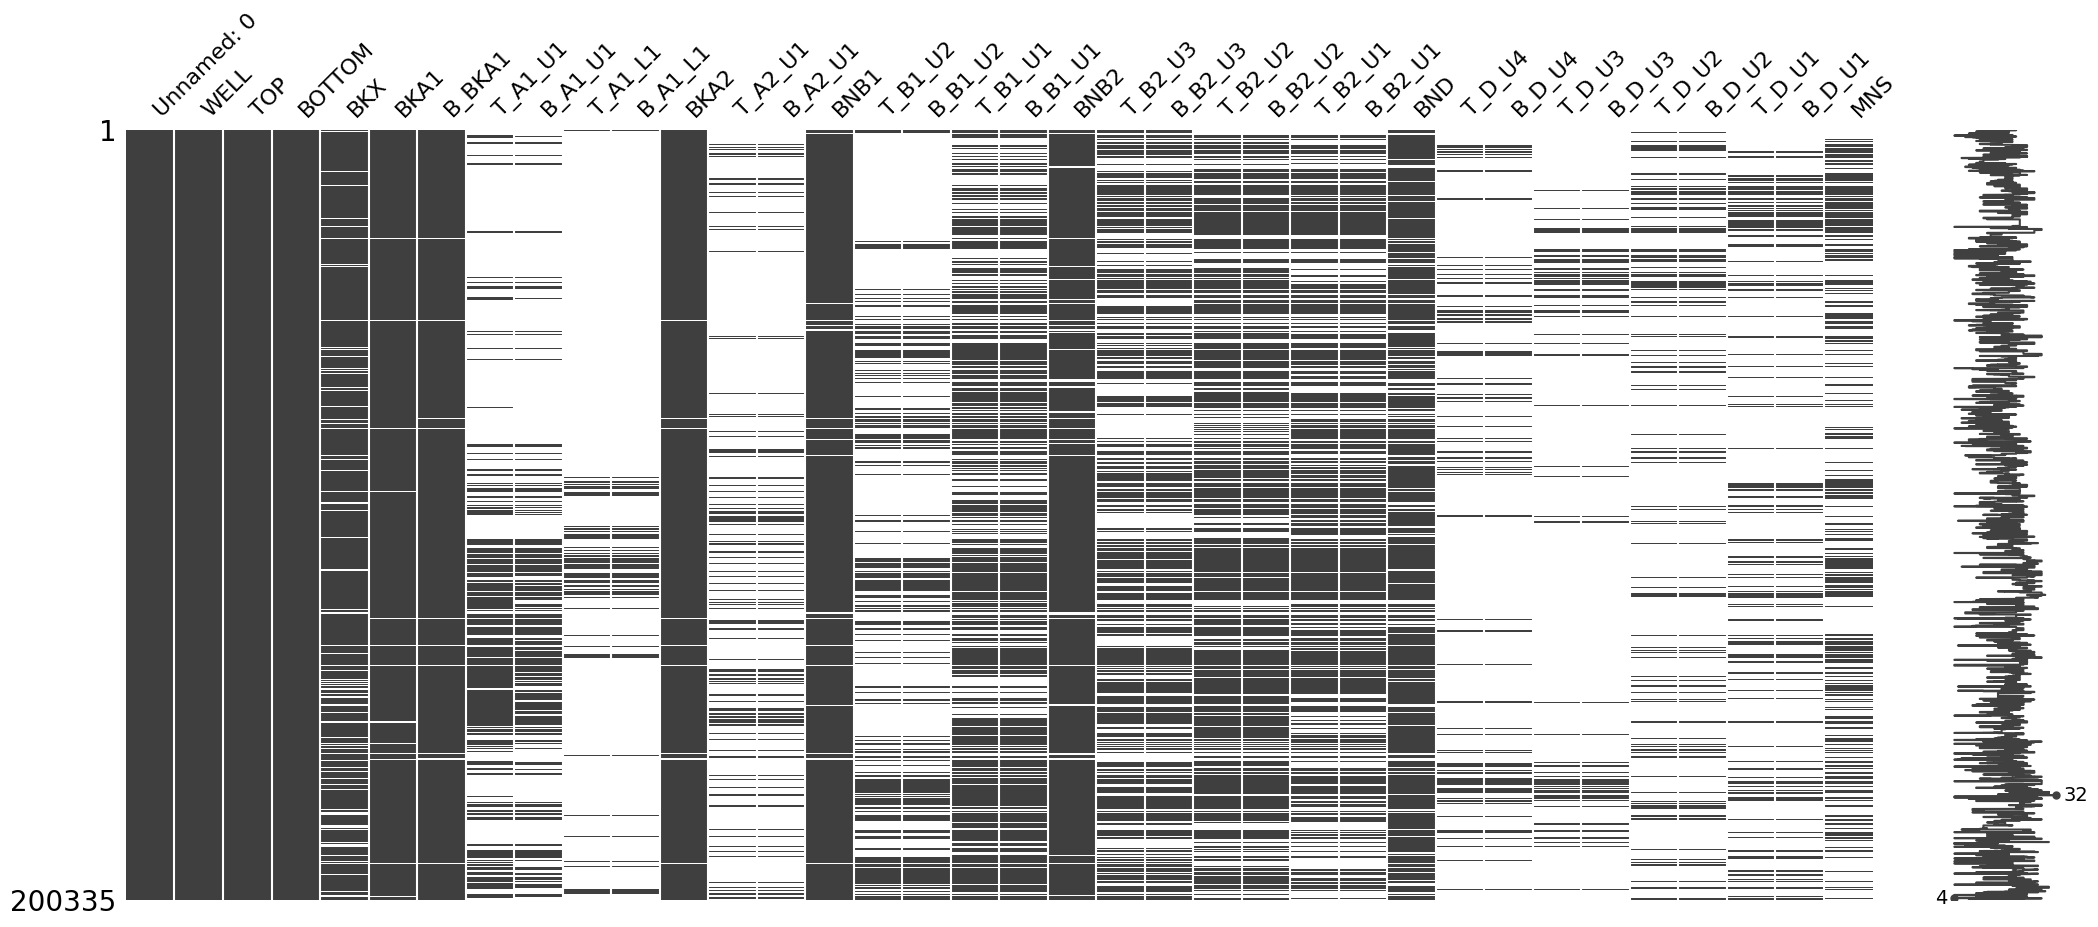

In [9]:
import missingno as msno

all_marker.isna().sum()
msno.matrix(all_marker)


In [11]:
all_marker.drop('Unnamed: 0', axis = 1, inplace = True)

In [17]:
all_marker

,WELL,TOP,BOTTOM,BKX,BKA1,B_BKA1,T_A1_U1,B_A1_U1,T_A1_L1,B_A1_L1,...,BND,T_D_U4,B_D_U4,T_D_U3,B_D_U3,T_D_U2,B_D_U2,T_D_U1,B_D_U1,MNS
0,0D96,2314.0,2321.0,2288.91,2309.28,2326.10,NaN,NaN,NaN,NaN,...,2457.73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0D96,2383.0,2388.0,2288.91,2309.28,2326.10,NaN,NaN,NaN,NaN,...,2457.73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0D97,2402.0,2407.0,2356.23,2382.84,2399.22,NaN,NaN,NaN,NaN,...,2511.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0D97,2428.0,2430.0,2356.23,2382.84,2399.22,NaN,NaN,NaN,NaN,...,2511.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0D97N,2684.0,2696.0,2558.14,2583.41,2601.92,NaN,NaN,NaN,NaN,...,2762.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200330,9E94,2524.0,2528.0,2345.88,2405.12,2430.46,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
200331,9E94,2528.0,2534.0,2345.88,2405.12,2430.46,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
200332,9E94,2546.0,2576.0,2345.88,2405.12,2430.46,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
200333,9E94,2576.0,2586.0,2345.88,2405.12,2430.46,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
import math

for i in all_marker.index:
    if math.isnan(all_marker['T_A1_U1'][i]) == True:
        print('oke')
    else:
        print('skip')

oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
oke
